In [ ]:
%pip install transformers==4.25.1
import torch
torch.set_default_tensor_type(torch.cuda.FloatTensor)
from transformers import AutoTokenizer, AutoModelForCausalLM
tokenizer = AutoTokenizer.from_pretrained("Salesforce/codegen-2B-mono")
model = AutoModelForCausalLM.from_pretrained("Salesforce/codegen-2B-mono")
inputs = tokenizer("# this function prints hello world", return_tensors="pt").to(0)
sample = model.generate(**inputs, max_length=128)
print(tokenizer.decode(sample[0], truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 28.0 MB/s eta 0:00:00


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/models/codegen/modeling_codegen.py:167: UserWarning: where received a uint8 condition tensor. This behavior is deprecated and will be removed in a future version of PyTorch. Use a boolean condition instead. (Triggered internally at ../aten/src/ATen/native/TensorCompare.cpp:493.)
  attn_weights = torch.where(causal_mask, attn_weights, mask_value)


# this function prints hello world

def hello_world():
    print("Hello World")

hello_world()


In [ ]:
inputs = tokenizer("# this function returns simple interest", return_tensors="pt").to(0)
sample = model.generate(**inputs, max_length=128)
print(tokenizer.decode(sample[0], truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# this function returns simple interest
# input:
#   principal: float
#   rate: float
#   time: float
# output:
#   simple interest: float
def simple_interest(principal, rate, time):
    return principal * (rate * time) / 100


In [ ]:
inputs = tokenizer("# this function returns maximum element in an array", return_tensors="pt").to(0)
sample = model.generate(**inputs, max_length=128)
print(tokenizer.decode(sample[0], truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# this function returns maximum element in an array
# if there are multiple maximum elements, it returns the first one

def max_element(arr):
    max_element = arr[0]
    for i in range(1, len(arr)):
        if arr[i] > max_element:
            max_element = arr[i]
    return max_element


##### We can see that CodeGen API is generating correct results for the above tasks. We will test the API on some more tasks:

#####**Using CodeGen to generate a function to create seaborn/ matplotlib plots**

In [ ]:
inputs = tokenizer("# this function creates a histogram using matplotlib, given a list of values", return_tensors="pt").to(0)
sample = model.generate(**inputs, max_length=200)
print(tokenizer.decode(sample[0], truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# this function creates a histogram using matplotlib, given a list of values
# it also creates a bar graph using matplotlib
# it also creates a pie chart using matplotlib
# it also creates a scatter plot using matplotlib
# it also creates a line graph using matplotlib
# it also creates a bar graph using matplotlib
# it also creates a pie chart using matplotlib
# it also creates a scatter plot using matplotlib
# it also creates a line graph using matplotlib
# it also creates a bar graph using matplotlib
# it also creates a pie chart using matplotlib
# it also creates a scatter plot using matplotlib
# it also creates a line graph using matplotlib
# it also creates a bar graph using matplotlib
# it also creates a pie chart using matplotlib
# it also creates a scatter plot using matplotlib
# it


In [ ]:
inputs = tokenizer("# this function creates a bar graph, given a list of x and y axis values, using seaborn", return_tensors="pt").to(0)
sample = model.generate(**inputs, max_length=200)
print(tokenizer.decode(sample[0], truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# this function creates a bar graph, given a list of x and y axis values, using seaborn
# it also plots the mean of the y axis values
# it also plots the standard deviation of the y axis values
# it also plots the median of the y axis values
# it also plots the quartiles of the y axis values
# it also plots the interquartile range of the y axis values
# it also plots the range of the y axis values
# it also plots the maximum and minimum of the y axis values
# it also plots the number of values in the y axis
# it also plots the number of values in the x axis
# it also plots the number of values in the y axis that are greater than the mean
# it also plots the number of values in the y axis that are less than the mean
# it also plots the number of values in the y axis that are greater than the median
# it also


##### we can see that CodeGen is not performing well when asked to generate plots

#####**Using CodeGen to generate a function that performs multiple tasks**

In [ ]:
inputs = tokenizer("# this function returns area and perimeter of a square", return_tensors="pt").to(0)
sample = model.generate(**inputs, max_length=128)
print(tokenizer.decode(sample[0], truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# this function returns area and perimeter of a square
# area = length * width
# perimeter = 2 * (length + width)

def square(length):
    area = length * length
    perimeter = 2 * (length + length)
    return area, perimeter


In [ ]:
inputs = tokenizer("# this function returns simple interest and compound interest", return_tensors="pt").to(0)
sample = model.generate(**inputs, max_length=200)
print(tokenizer.decode(sample[0], truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# this function returns simple interest and compound interest
# simple interest = (principal * rate * time) / 100
# compound interest = (principal * rate * time * (1 + rate) ** time) / ((1 + rate) ** time - 1)

def simple_interest(principal, rate, time):
    simple_interest = (principal * rate * time) / 100
    return simple_interest




In [ ]:
inputs = tokenizer("# this function returns compound interest and simple interest", return_tensors="pt").to(0)
sample = model.generate(**inputs, max_length=200)
print(tokenizer.decode(sample[0], truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# this function returns compound interest and simple interest
# for a given principal amount, rate of interest and time
# for which the compound interest is to be calculated
def compound_interest(principal, rate, time):
    compound_interest = principal * (pow((1 + rate / 100), time))
    return compound_interest


In [ ]:
inputs = tokenizer("# this function calculates the maximum element in an array, then calculates the minimum element and takes average of the two values", return_tensors="pt").to(0)
sample = model.generate(**inputs, max_length=200)
print(tokenizer.decode(sample[0], truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# this function calculates the maximum element in an array, then calculates the minimum element and takes average of the two values
# this function is used to calculate the average of the array

def max_min_avg(arr):
    max_num = arr[0]
    min_num = arr[0]
    sum = 0
    for i in range(len(arr)):
        if arr[i] > max_num:
            max_num = arr[i]
        if arr[i] < min_num:
            min_num = arr[i]
        sum += arr[i]
    avg = sum / len(arr)
    return max_num, min_num, avg


#####While the API is able to return the area and perimeter of the square in the 1st function, it is not able to generate accurate for most of the prompts where we are asking it to perform multiple tasks.
1. In case of simple and compund interest function, it is returning only the 1st term in the prompt
2. In the last function, it is not calculating the average correctly

##### **Using CodeGen to import popular libraries with different(uncommon) aliases**

In [ ]:
inputs = tokenizer("# this code imports numpy as pd", return_tensors="pt").to(0)
sample = model.generate(**inputs, max_length=128)
print(tokenizer.decode(sample[0], truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# this code imports numpy as pd and matplotlib as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
inputs = tokenizer("# this code imports numpy as ny", return_tensors="pt").to(0)
sample = model.generate(**inputs, max_length=128)
print(tokenizer.decode(sample[0], truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# this code imports numpy as nympy and matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib.colors


In [ ]:
inputs = tokenizer("# this code imports pandas as np", return_tensors="pt").to(0)
sample = model.generate(**inputs, max_length=128)
print(tokenizer.decode(sample[0], truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# this code imports pandas as np and matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sk


##### The API is not able to import numpy and pandas using uncommon aliases

##### **Using CodeGen to generate functions that return results of some popular equations**

In [ ]:
inputs = tokenizer("# this function returns the roots of a quatradtic equation ", return_tensors="pt").to(0)
sample = model.generate(**inputs, max_length=1000)
print(tokenizer.decode(sample[0], truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# this function returns the roots of a quatradtic equation 
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list
# the roots are returned in the form of a list


In [ ]:
inputs = tokenizer("# this function returns the roots of a quatradtic equation, given the constants a,b,c", return_tensors="pt").to(0)
sample = model.generate(**inputs, max_length=1000)
print(tokenizer.decode(sample[0], truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# this function returns the roots of a quatradtic equation, given the constants a,b,c,d

import math
import numpy as np

def quatradic_roots(a,b,c,d):
    # this function returns the roots of a quatradic equation, given the constants a,b,c,d
    
    # if a == 0, then the equation has no real roots
    if a == 0:
        return None
    
    # if a == b == c == d, then the equation has a single real root
    if a == b == c == d:
        return -b / (2 * a)
    
    # if a == b!= c == d, then the equation has two real roots
    if a == b!= c == d:
        return -b / (2 * a), -c / (2 * a)
    
    # if a == b == c!= d, then the equation has three real roots
    if a == b == c!= d:
        return -b / (2 * a), -c / (2 * a), -d / (2 * a)
    
    # if a == b!= c == d, then the equation has four real roots
    if a == b!= c == d:
        return -b / (2 * a), -c / (2 * a), -d / (2 * a), -e / (2 * a)
    
    # if a == b == c!= d, then the equation has five real roots
    if a == b == c!= d:

In [ ]:
inputs = tokenizer("# this function returns the net present value", return_tensors="pt").to(0)
sample = model.generate(**inputs, max_length=200)
print(tokenizer.decode(sample[0], truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# this function returns the net present value of a single investment
# it takes the following inputs:
# investment amount, interest rate, and number of years
# it returns the net present value
def investment_net_present_value(investment_amount, interest_rate, years):
    # calculate the investment's present value
    investment_value = investment_amount * (1 + interest_rate) ** years
    # return the investment's present value
    return investment_value


In [ ]:
inputs = tokenizer("# this function returns the gravitational force, using Newton's universal law of gravitation", return_tensors="pt").to(0)
sample = model.generate(**inputs, max_length=200)
print(tokenizer.decode(sample[0], truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# this function returns the gravitational force, using Newton's universal law of gravitation,
# and the gravitational force due to the sun, using Newton's universal law of gravitation
# and the gravitational force due to the earth, using Newton's universal law of gravitation
# and the gravitational force due to the moon, using Newton's universal law of gravitation
# and the gravitational force due to the sun, using Newton's universal law of gravitation
# and the gravitational force due to the earth, using Newton's universal law of gravitation
# and the gravitational force due to the moon, using Newton's universal law of gravitation
# and the gravitational force due to the sun, using Newton's universal law of gravitation
# and the gravitational force due to the earth, using Newton's universal law of gravitation
# and the gravitational force due to the moon, using Newton's universal law of gravitation
# and the gravitational force due to the sun, using


In [ ]:
inputs = tokenizer("# this function returns force using Newton's 2nd law of motion", return_tensors="pt").to(0)
sample = model.generate(**inputs, max_length=200)
print(tokenizer.decode(sample[0], truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# this function returns force using Newton's 2nd law of motion
# and the given acceleration
#
# Input:
#   x: position
#   v: velocity
#   a: acceleration
#
# Output:
#   force: force
#
# Author: Pavan Kumar Paluri
# Date: 11/11/2020

import math

def newtons_2nd_law_of_motion(x, v, a):
    # calculate the force
    force = (1/2)*(v**2) + (a*x)
    return force


##### we can see that the model is hallucinating and not generating the correct code for the above examples

 While CodeGen API works for a no. of prompts,the API struggles to generate accurate code when asked to write functions to:
1.	return results of some popular equations , such as function to return roots of quadratic equation, Net  Present Value, Gravitational force using Newton's Law of Universal Gravitation etc.
2.	display (seaborn and matplotlib)plots.
3.	Perform multiple tasks (in a single prompt) (in most cases)


#####We decided to focus on point 1 and tried to use various techniques for hallucination mitigation

###**Hallucination Mitigation**

#####**Web Scraping**

We are scraping wikipedia to extract correct equations, corresponding to equation name

In [ ]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=642629db0eb780a4e3e8201ebfd6f3850298242ed00cc2d02f893543efb1ce4f
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
import wikipedia
from bs4 import BeautifulSoup

In [ ]:
topic = wikipedia.page("Newton's second law of motion")
equations = BeautifulSoup(topic.html()).find_all('annotation')
equations[0].text.split('{\\displaystyle ')[1][:-1]

'{\\textbf {F}}={\\frac {d}{dt}}(m{\\textbf {v}})'

#####In addition to the equation, we got various unnecessary characters, which made it difficult to extract the equation from the scraped text. Hence we decided to come up with a different approach for extracting the formulae.

#### **Downloading images and extracting equations from images**
we downloaded bing images (using bing_image_downloader package), corresponding to the formula name and use pytesseract package to extract the formula as a string from the downloaded image.

In [ ]:
!pip install bing-image-downloader

In [ ]:
from bing_image_downloader import downloader
query_string="Newtons second law of motion"
downloader.download(query_string, limit=1,  output_dir='dataset',
adult_filter_off=True, force_replace=False, timeout=60)

[%] Downloading Images to /content/dataset/Newtons second law of motion


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://studiousguy.com/wp-content/uploads/2021/04/Newtons-Second-Law-of-Motion.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.


#####The downloaded image/images can be different from the one I got when I executed the code snippet, if someone runs the code again. I got the following image:

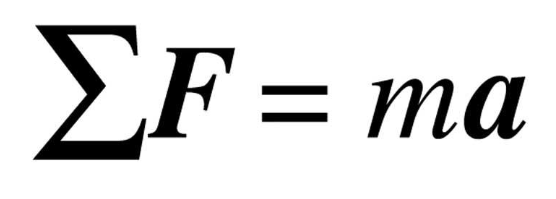

##### we are using the following code to extract equations from images. The code was written in a separate .py file and not on colab notebook as we were facing issues accessing pytesseract executable file from the local machine on colab.
We have attached the img_to_txt.py file in the drive. So, the user will have to download the image containing the equation from colab to a local path and then execute the following code from your local using command : py img_to_txt.py

In [ ]:
# from PIL import Image
# from pytesseract import pytesseract

# # Defining paths to tesseract.exe
# # and the image we would be using
# path_to_tesseract = "C:/Program Files/Tesseract-OCR/tesseract.exe"
# image_path = "C:/Users/Shrey/Downloads/Image_1.jpg"

# # Opening the image & storing it in an image object
# img = Image.open(image_path)

# # Providing the tesseract executable
# # location to pytesseract library
# pytesseract.tesseract_cmd = path_to_tesseract

# # Passing the image object to image_to_string() function
# # This function will extract the text from the image
# text = pytesseract.image_to_string(img)

# # Displaying the extracted text
# formula=text[:-1]
# print(formula)

got the following result on executing the script:

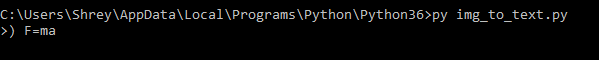

####**Using LLMs (AI21 Jurassic-2 model)**

#####We used ai21 Jurassic 2 LLM to generate code from the equation name. This was a prompt engineering task, where we passed prompts to the model to get the correct code.We passed prompts where we asked:
i.	the model to generate code, given the equation name

ii.	first, asked the model to get the corresponding equation, then extracted the input and output variables using Abstract Syntax Trees, and then asked the model to write a function to return the output, given input arguments as parameters


In [ ]:
!pip install ai21

  Preparing metadata (setup.py) ... done
  Created wheel for ai21: filename=ai21-1.2.5-py3-none-any.whl size=24567 sha256=cef192794a3a286d0f0e9d714f6187c2789ab7e24fca3546f067e0ed0f2bc110
  Stored in directory: /root/.cache/pip/wheels/52/cb/57/af8ae7e37ef917154f7250c2e4b9ab223a5edd958c21ddf459
Successfully built ai21


In [ ]:
import ai21
ai21.api_key = 'vbPNxc1zl9UYE2fH0ycXhEtHSvWeKlfJ'

In [ ]:
def getResponse(prompt):
  response_mid = ai21.Completion.execute(
    model="j2-mid",
    prompt=prompt,
    numResults=1,
    maxTokens=300,
    temperature=0,
    topKReturn=0,
    topP=1,
    stopSequences=["==="]
  )
  return response_mid['completions'][0]['data']['text']

In [ ]:
alph='abcdefghijklmnopqrstuvwxyz'
def process(str):
  res=str[0]
  for idx in range(len(str)-1):
    if str[idx] in alph and str[idx+1] in alph:
      res+=","+ str[idx+1]
  return res

i) Single prompt approach:
we ask the the model to generate code, given the equation name, using 1 prompt

In [ ]:
prompt="write a python function to return output of newton's second law of motion"
res=getResponse(prompt)
print(res)


```
def newtons_second_law(mass, acceleration):
    return mass * acceleration

```

This function takes in two parameters:`mass`and`acceleration`. It returns the product of`mass`and`acceleration`, which is the second law of motion according to Newton's second law of motion.


In [ ]:
prompt="write a python function to return output of newton's universal law of gravitation"
res=getResponse(prompt)
print(res)


```
def newton_universal_law(m1, m2, r):
    return m1 * m2 / r ** 2

```

This function takes three arguments:`m1`, the mass of the first object,`m2`, the mass of the second object, and`r`, the distance between them. It returns the product of the masses divided by the square of the distance between them. This is Newton's universal law of gravitation.


#####We can see that while the model is generating correct equation for Newton's second law, it is not giving accurate results for Newton's law of Gravitation ( function should return Gxm1xm2/r^2)

ii) multi prompt approach
In the first prompt,we asked the model to get the corresponding equation, then extracted the input and output variables using Abstract Syntax Trees, and then asked the model to write a function to return the output, given input arguments as parameters in the second prompt

In [ ]:
equationList=[]

In [ ]:
prompt="return only the equation and nothing else. newtons universal law of gravitation equation:"
res=getResponse(prompt)
equationList.append(res.split('\n')[1])
equationList

['F = G * m1 * m2 / r^2']

In [ ]:
prompt="return only the equation and nothing else. newtons second law of motion:"
res=getResponse(prompt)
equationList.append(res.split('\n')[1])
equationList

['F = G * m1 * m2 / r^2', 'F = ma']

In [ ]:
import ast

for eq in equationList:
  inputs=[]
  names = [
      node.id for node in ast.walk(ast.parse(str(eq)))
      if isinstance(node, ast.Name)
  ]
  inputs=names[1:]
  arguments=""
  for argument in inputs:
    arguments+=str(process(argument))+","
  arguments=arguments[:-1]
  output=names[0]
  prompt="given the equation:"+str(eq)+" write a python function to return output,"+output+". use inputs:"+arguments+" as function parameters"
  res=getResponse(prompt)
  print("--"*50)
  print("prompt:",prompt)
  print()
  print(res)

----------------------------------------------------------------------------------------------------
prompt: given the equation:F = G * m1 * m2 / r^2 write a python function to return output,F. use inputs:r,m,G,m as function parameters


```
def F(r, m, G, m):
    return G * m * m / r**2

```

This function takes in four parameters:`r`,`m`,`G`, and`m`. The`r`parameter represents the radius of the object,`m`represents the mass of the object,`G`represents the gravitational constant, and`m`represents the mass of the other object.

The function multiplies`m`by`m`and`G`by`m`, then divides the result by`r**2`to get the force in Newtons. Finally, it returns the force.
----------------------------------------------------------------------------------------------------
prompt: given the equation:F = ma write a python function to return output,F. use inputs:m,a as function parameters


```
def force(m, a):
    return m * a

```

This function takes two parameters,`m`and`a`, which represent the m

We can see that in this approach, the model is generating correct code in the above examples

In [ ]:
equationList=[]
prompt="return only the equation and nothing else. roots of quadratic equation:"
res=getResponse(prompt)
print(res)
equationList.append(res.split('\n')[1])
equationList


The quadratic equation is:

ax^2 + bx + c = 0

where a, b, and c are constants and a is not equal to zero.


['The quadratic equation is:']

However, we can still not generalize this for all equations, as we can see from above code snippet that the LLMs that we are using are not able to generate the correct equation, as a result of which we won't be able to get the correct code to return roots of quadratic equations

#####In order to improve the API and overcome hallucinations, we need to come up with better techniques or improve the ones we tried. We will invest in data preprocessing techniques to clean and normalize equations extracted from sources like Wikipedia or images, reducing irrelevant characters and improving formula accuracy. Image Extraction Refinement will be another technique where in we will invest in refining techniques for extracting equations from images